In [6]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
import plotly.express as px
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
import pickle
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
#               columns dataset
# Broker Titile                  => عنوان بروکر
# Type                           => نوع
# Price                          => قیمت
# Beds                           => اتاق ها
# Bath                           => حمام
# Property SQFT                  => مساحت
# Address                        => آدرس
# State                          => ایالت - استان
# Main address                   => آدرس کامل
# Admin Strative area Level 2    => منطفه لول 2
# Locality                       => جا ، مکان
# Sublocality                    => زیر مجموعه
# Street Name                    => نام خیابان
# Long name                      => اسم طولانی
# Formatted Address              => فرمت آدرس
# Latitiude                      => عرض جغرافیایی
# Longitude                      => طول جغرافیایی

In [7]:
# import data
data = pd.read_csv('NY-House-Dataset.csv')
data.head(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109


In [8]:
# info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [9]:
# data nunique
data.nunique()

BROKERTITLE                    1036
TYPE                             13
PRICE                          1274
BEDS                             27
BATH                             22
PROPERTYSQFT                   1445
ADDRESS                        4582
STATE                           308
MAIN_ADDRESS                   4583
ADMINISTRATIVE_AREA_LEVEL_2      29
LOCALITY                         11
SUBLOCALITY                      21
STREET_NAME                     174
LONG_NAME                      2731
FORMATTED_ADDRESS              4550
LATITUDE                       4196
LONGITUDE                      4118
dtype: int64

In [11]:
def show_chart_barplot(data,x_,title,xlabel,ylabel,y_=None,style='whitegrid',color='viridis',width_=0.5
    ,money_format=False):
    plt.figure(figsize=(15,5))
    sns.set_style(style)
    ax=sns.barplot(data=data,x=x_,y=y_,width=width_,palette=color,hue=x_, legend=False)
    for p in ax.patches:
        format_ = p.get_height()
        if money_format == True:
            format_ = f" $ {format_:,.0f}"
            ax.annotate(format(format_),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha = 'center', va = 'center',
            xytext = (0, 9),
            textcoords = 'offset points')
        else:
            ax.annotate(format(format_),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha = 'center', va = 'center',
            xytext = (0, 9),
            textcoords = 'offset points')
    plt.title(title,fontsize=14)
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.xticks(range(len(data)), data[x_], rotation=45, ha='right')
    plt.show()

In [12]:
def show_chart_barplot_up(data, x_, title, xlabel, ylabel, y_=None, style='whitegrid', color='viridis', width_=0.5, money_format=False):  
    plt.figure(figsize=(15, 5))  
    sns.set_style(style)  
    ax = sns.barplot(data=data, y=x_, x=y_, width=width_, palette=color)  

    # افزودن مقادیر به بالای میله‌ها  
    for p in ax.patches:  
        value = p.get_width()  
        if money_format == True:  
            value = f" $ {value:,.0f}"  # فرمت پولی  
        ax.annotate(value,  
                    (p.get_width(), p.get_y() + p.get_height() / 2),  
                    ha='left', va='center')  
    
    plt.title(title, fontsize=14)  
    plt.xlabel(xlabel, fontsize=12)  
    plt.ylabel(ylabel, fontsize=12)  
    plt.xticks(rotation=45, ha='right')  # چرخش برچسب‌های محور افقی  
    plt.show() 

In [13]:
def haversine(lat1,lon1,lat2=40.776676,lon2=-73.971321):
    R = 6371.0
    lat1_ = math.radians(lat1)
    lon1_ = math.radians(lon1)
    lat2_ = math.radians(lat2)
    lon2_ = math.radians(lon2)
    dlat = lat2_ - lat1_
    dlon = lon2_ - lon1_
    a = math.sin(dlat/2)**2+math.cos(lat1_)*math.cos(lat2_)*math.sin(dlon/2)**2
    c = 2* math.atan2(math.sqrt(a),math.sqrt(1-a))
    return (R * c)*1000

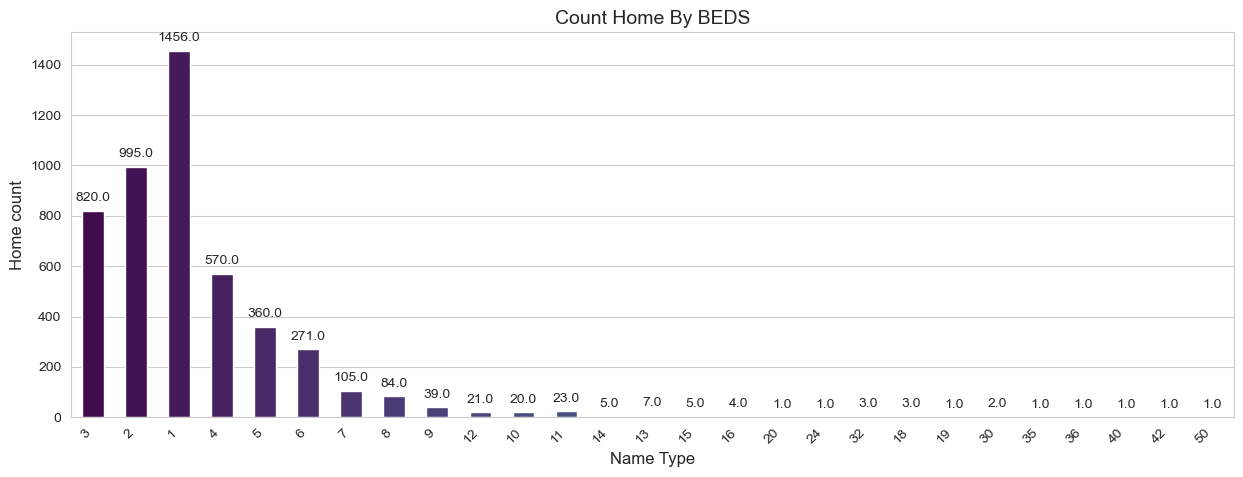

In [14]:
count_home_by_beds = data.groupby('BEDS').size().sort_values(ascending=False).reset_index()
count_home_by_beds = DataFrame(count_home_by_beds)
count_home_by_beds.rename(columns={0:'Count'},inplace=True)
#---------------------------------------------------
show_chart_barplot(count_home_by_beds,'BEDS','Count Home By BEDS','Name Type','Home count','Count',money_format=False)
#---------------------------------------------------

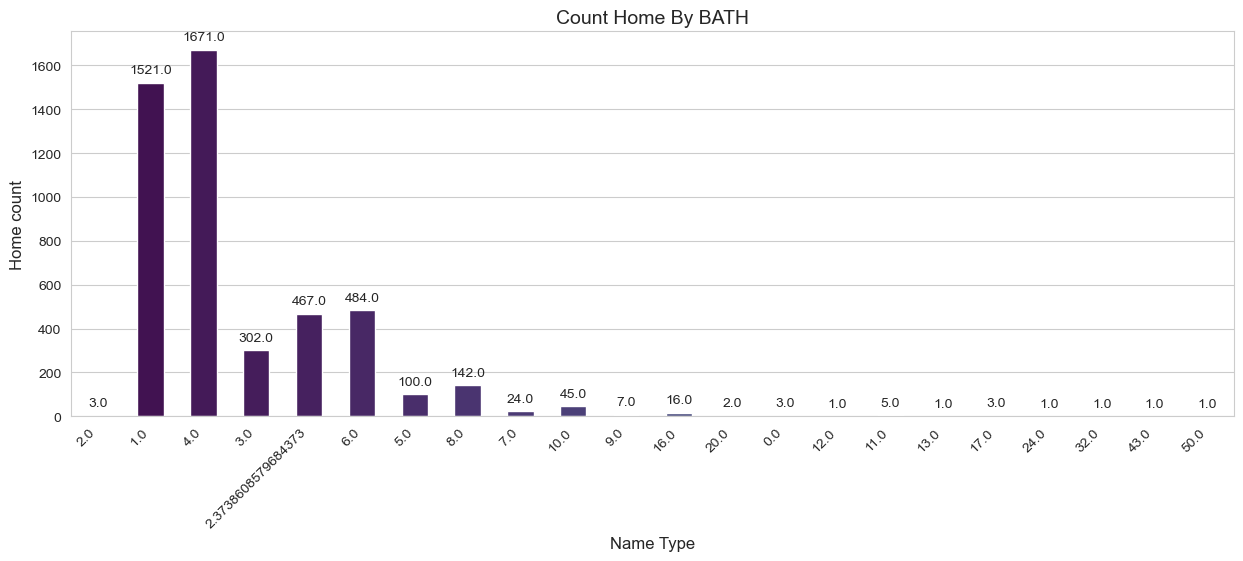

In [15]:
count_home_by_bath = data.groupby('BATH').size().sort_values(ascending=False).reset_index()
count_home_by_bath = DataFrame(count_home_by_bath)
count_home_by_bath.rename(columns={0:'Count'},inplace=True)
#---------------------------------------------------
show_chart_barplot(count_home_by_bath,'BATH','Count Home By BATH','Name Type','Home count','Count')
#---------------------------------------------------

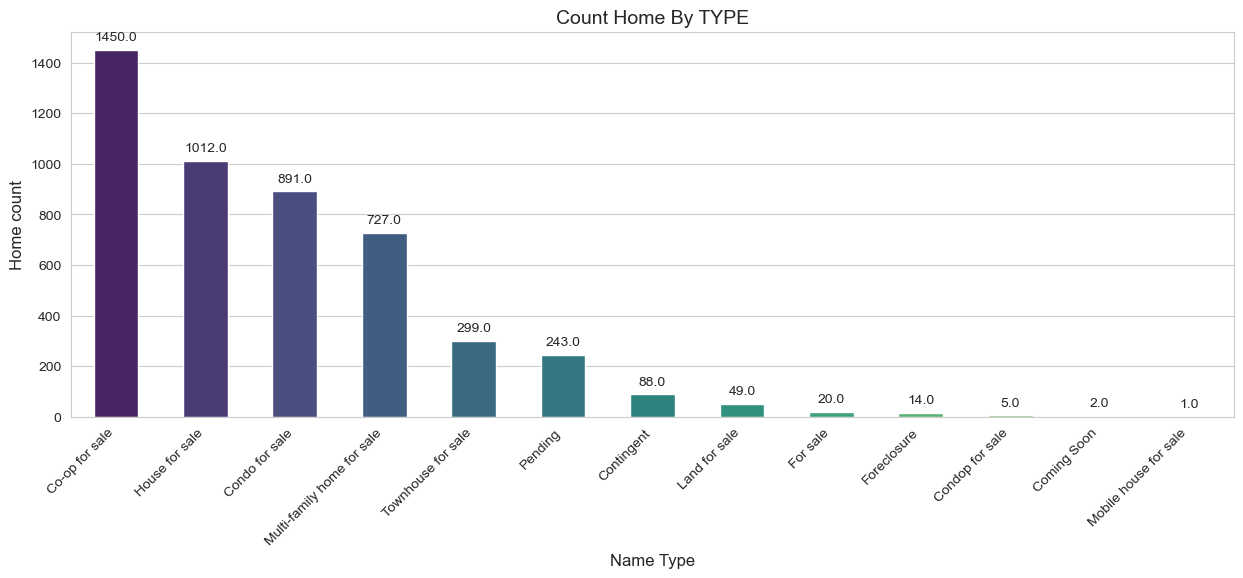

In [16]:
count_home_by_TYPE = data.groupby('TYPE').size().sort_values(ascending=False).reset_index()
count_home_by_TYPE = DataFrame(count_home_by_TYPE)
count_home_by_TYPE.rename(columns={0:'Count'},inplace=True)
#---------------------------------------------------
show_chart_barplot(count_home_by_TYPE,'TYPE','Count Home By TYPE','Name Type','Home count','Count')
#---------------------------------------------------

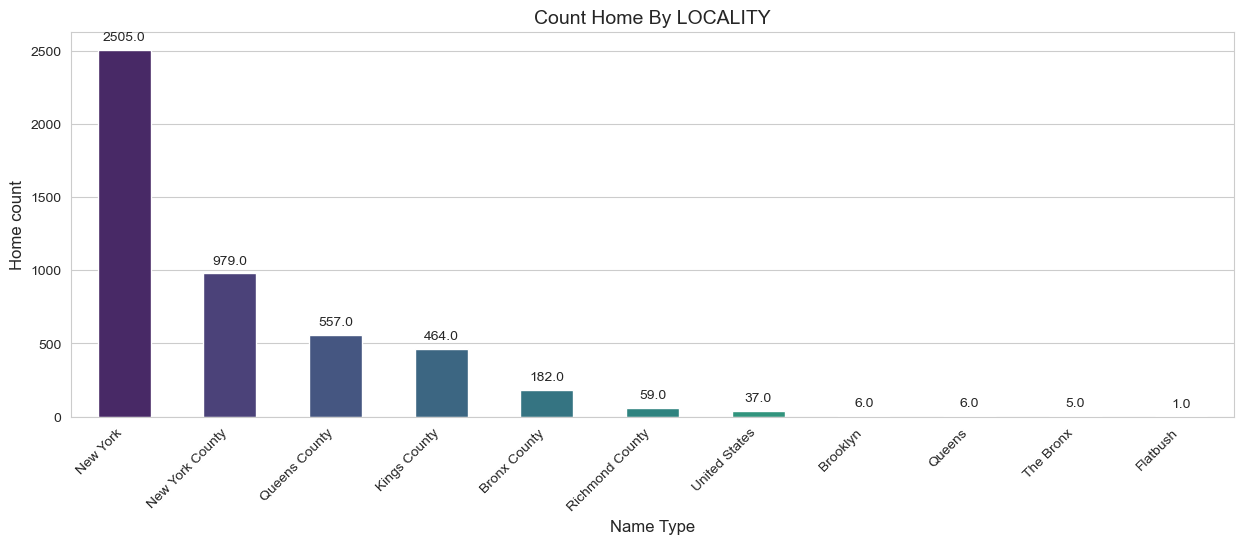

In [17]:
count_home_by_LOCALITY = data.groupby('LOCALITY').size().sort_values(ascending=False).reset_index()
count_home_by_LOCALITY = DataFrame(count_home_by_LOCALITY)
count_home_by_LOCALITY.rename(columns={0:'Count'},inplace=True)
#---------------------------------------------------
show_chart_barplot(count_home_by_LOCALITY,'LOCALITY','Count Home By LOCALITY','Name Type','Home count','Count')
#---------------------------------------------------

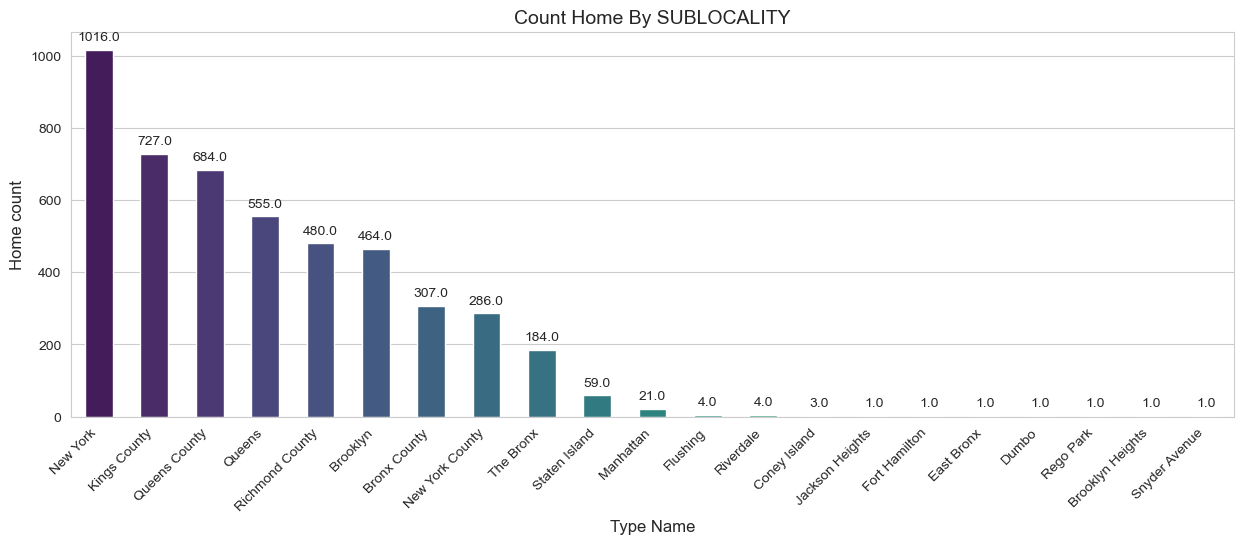

In [18]:
count_home_by_SUBLOCALITY = data.groupby('SUBLOCALITY').size().sort_values(ascending=False).reset_index()
count_home_by_SUBLOCALITY = DataFrame(count_home_by_SUBLOCALITY)
count_home_by_SUBLOCALITY.rename(columns={0:'Count'},inplace=True)
#---------------------------------------------------
show_chart_barplot(count_home_by_SUBLOCALITY,'SUBLOCALITY','Count Home By SUBLOCALITY','Type Name','Home count','Count')
#---------------------------------------------------

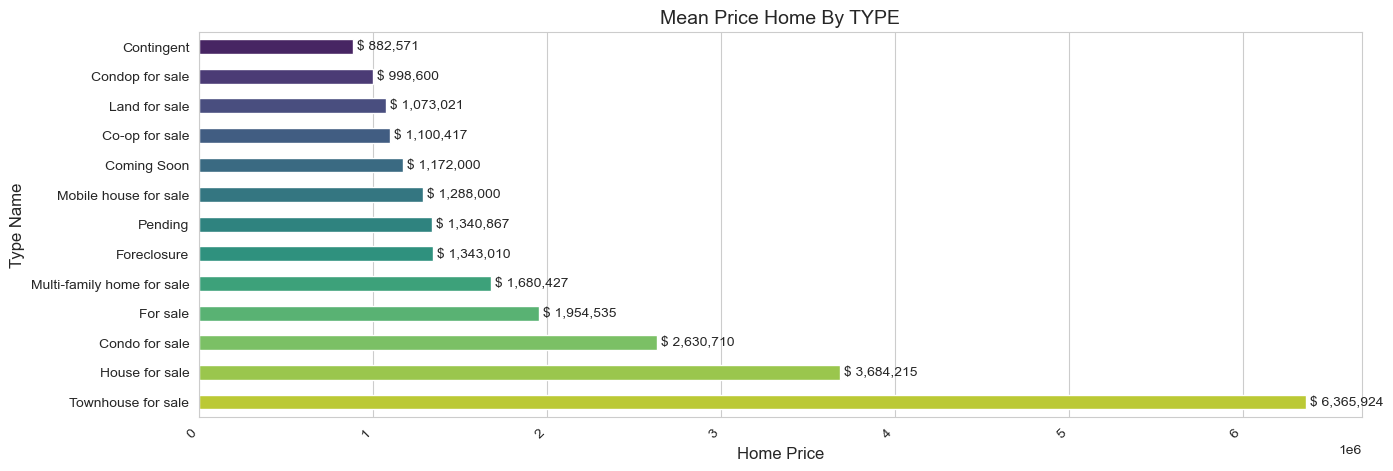

In [19]:
count_home_by_Price = data.groupby('TYPE').mean('PRICE')
count_home_by_Price = count_home_by_Price['PRICE'].sort_values()
count_home_by_Price = DataFrame(count_home_by_Price,dtype=int).reset_index()
count_home_by_Price.rename(columns={0:'Count'},inplace=True)
#---------------------------------------------------
show_chart_barplot_up(count_home_by_Price,'TYPE','Mean Price Home By TYPE','Home Price','Type Name','PRICE',money_format=True)
#---------------------------------------------------

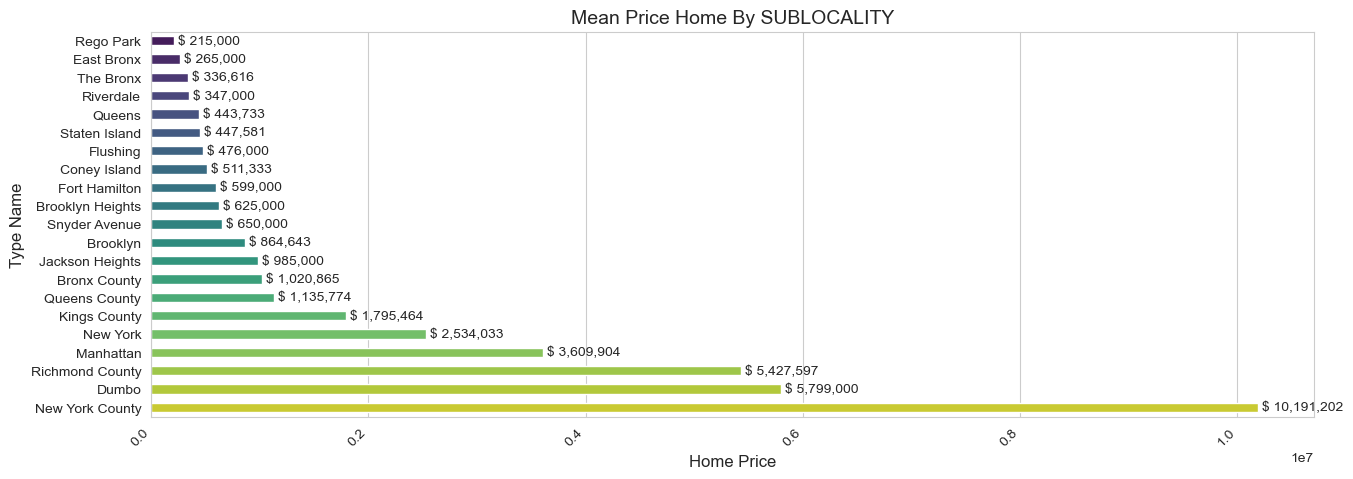

In [20]:
SUBLOCALITY_home_by_Price = data.groupby('SUBLOCALITY').mean('PRICE')
SUBLOCALITY_home_by_Price = SUBLOCALITY_home_by_Price['PRICE'].sort_values()
SUBLOCALITY_home_by_Price = DataFrame(SUBLOCALITY_home_by_Price,dtype=int).reset_index()
SUBLOCALITY_home_by_Price.rename(columns={0:'Count'},inplace=True)
#---------------------------------------------------
show_chart_barplot_up(SUBLOCALITY_home_by_Price,'SUBLOCALITY','Mean Price Home By SUBLOCALITY','Home Price','Type Name','PRICE',money_format=True)
#---------------------------------------------------

In [21]:
data.head(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109


In [22]:
df = data

In [23]:
label_encoders = {}
#---------------------------------------------------------------------------
Type_label = LabelEncoder()
label_encoders['TYPE_Transform'] = Type_label.fit_transform(df['TYPE'])
label_encoders['TYPE_Label'] = list(Type_label.classes_)
#---------------------------------------------------------------------------
label_encoders['SUBLOCALITY_Transform'] = Type_label.fit_transform(df['SUBLOCALITY'])
label_encoders['SUBLOCALITY_Label'] = list(Type_label.classes_)

In [24]:
df['TYPE'] = label_encoders['TYPE_Transform']
df['SUBLOCALITY'] = label_encoders['SUBLOCALITY_Transform']
df.head(2)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,2,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,10,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,2,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,12,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991


In [25]:
df['BEDS_BATH_RATIO'] = df['BEDS'] / df['BATH'].replace({0: 1})  # جلوگیری از تقسیم بر صفر

df['SQFT_BEDS_RATIO'] = df['PROPERTYSQFT'] / df['BEDS'].replace({0: 1})  # جلوگیری از تقسیم بر صفر

df['SQFT_BATH_RATIO'] = df['PROPERTYSQFT'] / df['BATH'].replace({0: 1})  # جلوگیری از تقسیم بر صفر

df['SQFT For TotalRooms'] = df['PROPERTYSQFT'] / (df['BEDS']+df['BATH'])

df['LOCATION_SIZE'] = df['LATITUDE'] * df['LONGITUDE'] * df['PROPERTYSQFT']  

df['Distance_to_center'] = df.apply(lambda row:haversine(row['LATITUDE'],row['LONGITUDE']),axis=1)

In [26]:
# drop few features
df = df.drop(['BROKERTITLE','ADDRESS','STATE','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','LOCALITY','STREET_NAME','LONG_NAME','FORMATTED_ADDRESS'],axis=1)

In [27]:
df.columns.to_list()

['TYPE',
 'PRICE',
 'BEDS',
 'BATH',
 'PROPERTYSQFT',
 'SUBLOCALITY',
 'LATITUDE',
 'LONGITUDE',
 'BEDS_BATH_RATIO',
 'SQFT_BEDS_RATIO',
 'SQFT_BATH_RATIO',
 'SQFT For TotalRooms',
 'LOCATION_SIZE',
 'Distance_to_center']

In [28]:
df.head(2)

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,LATITUDE,LONGITUDE,BEDS_BATH_RATIO,SQFT_BEDS_RATIO,SQFT_BATH_RATIO,SQFT For TotalRooms,LOCATION_SIZE,Distance_to_center
0,2,315000,2,2.0,1400.0,10,40.761255,-73.974483,1.0,700.000000,700.0,350.000000,-4.221410e+06,1735.294565
1,2,195000000,7,10.0,17545.0,12,40.766393,-73.980991,0.7,2506.428571,1754.5,1032.058824,-5.291464e+07,1403.697258


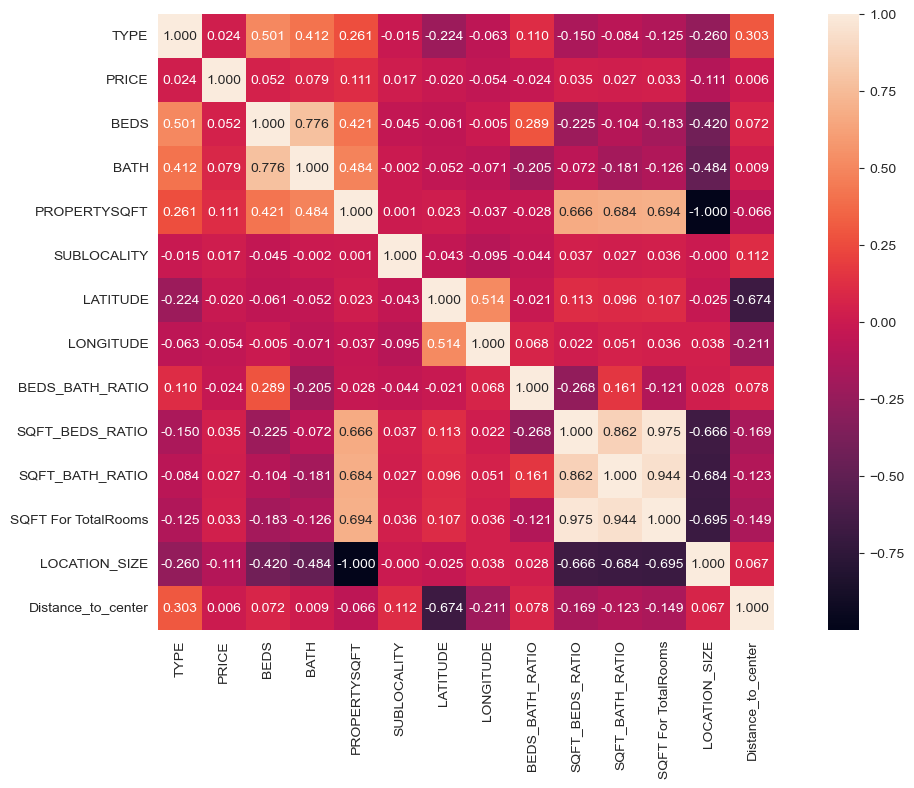

In [29]:
plt.figure(figsize=(14,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr,square=True,annot=True,fmt=".3f")
plt.show()

In [30]:
list_columns = df.columns.to_list()
list_columns

['TYPE',
 'PRICE',
 'BEDS',
 'BATH',
 'PROPERTYSQFT',
 'SUBLOCALITY',
 'LATITUDE',
 'LONGITUDE',
 'BEDS_BATH_RATIO',
 'SQFT_BEDS_RATIO',
 'SQFT_BATH_RATIO',
 'SQFT For TotalRooms',
 'LOCATION_SIZE',
 'Distance_to_center']

In [31]:
def show_outlier(data_,name_columns):
   for name_column in name_columns:
      df = DataFrame(data_)
      fig = px.box(df,y=name_column)
      fig.show()

In [32]:
show_outlier(df,list_columns)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TYPE                 4801 non-null   int32  
 1   PRICE                4801 non-null   int64  
 2   BEDS                 4801 non-null   int64  
 3   BATH                 4801 non-null   float64
 4   PROPERTYSQFT         4801 non-null   float64
 5   SUBLOCALITY          4801 non-null   int32  
 6   LATITUDE             4801 non-null   float64
 7   LONGITUDE            4801 non-null   float64
 8   BEDS_BATH_RATIO      4801 non-null   float64
 9   SQFT_BEDS_RATIO      4801 non-null   float64
 10  SQFT_BATH_RATIO      4801 non-null   float64
 11  SQFT For TotalRooms  4801 non-null   float64
 12  LOCATION_SIZE        4801 non-null   float64
 13  Distance_to_center   4801 non-null   float64
dtypes: float64(10), int32(2), int64(2)
memory usage: 487.7 KB


In [34]:
def remove_outliers(df, column_list):  
    for column in column_list:  
        Q1 = np.percentile(df[column], 25)  # 20% percentile  
        Q3 = np.percentile(df[column], 75)  # 80% percentile  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  
    display(df)
    return df  


In [35]:
new_data = remove_outliers(df,list_columns)

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,LATITUDE,LONGITUDE,BEDS_BATH_RATIO,SQFT_BEDS_RATIO,SQFT_BATH_RATIO,SQFT For TotalRooms,LOCATION_SIZE,Distance_to_center
0,2,315000,2,2.000000,1400.000000,10,40.761255,-73.974483,1.000000,700.000000,700.000000,350.000000,-4.221410e+06,1735.294565
3,2,69000,3,1.000000,445.000000,12,40.761398,-73.974613,3.000000,148.333333,445.000000,111.250000,-1.341812e+06,1721.316067
6,2,899500,2,2.000000,2184.207862,11,40.809448,-73.946777,1.000000,1092.103931,1092.103931,546.051966,-6.591343e+06,4189.084754
8,0,265000,1,1.000000,750.000000,5,40.821586,-73.874089,1.000000,750.000000,750.000000,375.000000,-2.261743e+06,9587.665562
10,0,375000,2,1.000000,850.000000,20,40.824870,-73.922983,2.000000,425.000000,850.000000,283.333333,-2.565212e+06,6728.508957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,2,2600000,3,2.000000,1729.000000,11,40.733031,-73.985037,1.500000,576.333333,864.500000,345.800000,-5.210575e+06,4988.719235
4787,2,499000,3,1.000000,472.000000,11,40.800382,-73.953136,3.000000,157.333333,472.000000,118.000000,-1.424173e+06,3048.326203
4790,2,789000,3,2.373861,800.000000,11,40.717926,-74.000594,1.263764,266.666667,337.003745,148.868760,-2.410521e+06,6982.624696
4794,2,945000,2,2.000000,903.000000,11,40.816711,-73.942050,1.000000,451.500000,451.500000,225.750000,-2.725318e+06,5088.097028


In [36]:
print(f"Count Duplicates Rows Before : {new_data.duplicated().sum()}")
new_data.drop_duplicates(inplace=True)
print(f"Count Duplicates Rows After : {new_data.duplicated().sum()}")

Count Duplicates Rows Before : 99
Count Duplicates Rows After : 0


In [37]:
def min_max_scaler(data,columns):
    scaler=MinMaxScaler()
    data=scaler.fit_transform(data)
    data=pd.DataFrame(data)
    data.columns=columns
    return data

In [38]:
new_data_dataframe = pd.DataFrame(new_data)
new_data_dataframe.to_csv('new_data_new_york.csv')

In [39]:
# متغیر هدف و ویژگی‌ها
X = new_data.drop( ['PRICE'], axis=1)  # ویژگی‌ها
y = new_data['PRICE']  # قیمت به عنوان هدف
X = pd.get_dummies(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X.columns.to_list()

['TYPE',
 'BEDS',
 'BATH',
 'PROPERTYSQFT',
 'SUBLOCALITY',
 'LATITUDE',
 'LONGITUDE',
 'BEDS_BATH_RATIO',
 'SQFT_BEDS_RATIO',
 'SQFT_BATH_RATIO',
 'SQFT For TotalRooms',
 'LOCATION_SIZE',
 'Distance_to_center']

In [41]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [42]:
X_train_scaler

array([[ 0.54149426,  0.87881574,  0.152431  , ...,  0.36124039,
        -0.96039036,  0.32176143],
       [ 1.52809112,  0.09181657, -1.4465408 , ..., -2.68198046,
         1.96012288, -1.62086038],
       [-0.69175182, -0.6951826 ,  0.152431  , ...,  1.37685921,
        -0.47502272,  0.29781976],
       ...,
       [ 0.54149426,  0.09181657,  0.152431  , ...,  1.09361127,
        -0.96599211, -0.65608299],
       [ 0.54149426,  0.87881574,  1.75140279, ..., -0.16188167,
        -0.95637303,  0.59783002],
       [-0.69175182,  0.09181657,  0.152431  , ...,  1.09361127,
        -0.9663938 ,  1.04240361]])

In [43]:
model_1 = RandomForestRegressor()
model_2 = GradientBoostingRegressor()
model_3 = XGBRegressor()
param_grid = {  
    'n_estimators': [300,400,500],
    'max_depth': [None ,70,80,90],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}  

In [44]:
param_grid = {  
    'n_estimators': [300,400,500],
    'max_depth': [None ,80,90,100],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [2, 4, 8]  
}  

In [42]:
grid_model_1 = GridSearchCV(estimator=model_1,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_model_1.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [79]:
grid_model_2 = GridSearchCV(estimator=model_1,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_model_2.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 80, 90, 100],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error')

In [69]:
grid_model_3 = GridSearchCV(estimator=model_1,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_model_3.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 70, 80, 90],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [400, 500, 600]},
             scoring='neg_mean_squared_error')

In [85]:
grid_search_model_1 = GridSearchCV(estimator=model_1,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_search_model_2 = GridSearchCV(estimator=model_3,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
ensemble_model = VotingRegressor(estimators=[('at',grid_search_model_1),('lr',grid_search_model_2)])
ensemble_model.fit(X_train_scaler, y_train)

VotingRegressor(estimators=[('at',
                             GridSearchCV(cv=5,
                                          estimator=RandomForestRegressor(),
                                          n_jobs=-1,
                                          param_grid={'max_depth': [None, 80,
                                                                    90, 100],
                                                      'min_samples_leaf': [2, 4,
                                                                           8],
                                                      'min_samples_split': [2,
                                                                            5,
                                                                            10],
                                                      'n_estimators': [300, 400,
                                                                       500]},
                                          scoring='neg_mean_squared_error')),
                            ('lr',
                             GridSearchCV(cv=5,
                                          estimator=XGBRegressor(base_score=None,
                                                                 booster=None,
                                                                 callbacks=None,
                                                                 c...
                                                                 max_depth=None,
                                                                 max_leaves=None,
                                                                 min_child_weight=None,
                                                                 missing=nan,
                                                                 monotone_constraints=None,
                                                                 multi_strategy=None,
                                                                 n_estimators=None,
                                                                 n_jobs=None,
                                                                 num_parallel_tree=None,
                                                                 random_state=None, ...),
                                          n_jobs=-1,
                                          param_grid={'max_depth': [None, 80,
                                                                    90, 100],
                                                      'min_samples_leaf': [2, 4,
                                                                           8],
                                                      'min_samples_split': [2,
                                                                            5,
                                                                            10],
                                                      'n_estimators': [300, 400,
                                                                       500]},
                                          scoring='neg_mean_squared_error'))])

In [86]:
best_model = ensemble_model

In [87]:
predictions = best_model.predict(X_test_scaler)

In [88]:
r2 = r2_score(y_test, predictions)
print(f'R^2: \t{r2}')
print('-'*60)
#------------------------------------------------------
rmse = mean_squared_error(y_test, predictions)
print(f'RMSE: \t{rmse}')
print('-'*60)
#------------------------------------------------------
MAE = mean_absolute_error(y_test, predictions)
print(f'mean_absolute_error : \t{MAE}')
print('-'*60)
#------------------------------------------------------
MAPE = mean_absolute_percentage_error(y_test, predictions)
print(f'mean_absolute_percentage_error : \t{MAPE}')
print('-'*60)
#------------------------------------------------------

R^2: 	0.7272179325158912
------------------------------------------------------------
RMSE: 	90596928158.09175
------------------------------------------------------------
mean_absolute_error : 	198456.48034760836
------------------------------------------------------------
mean_absolute_percentage_error : 	0.24896963917779147
------------------------------------------------------------


In [90]:
train_score = best_model.score(X_train_scaler,y_train)
test_score = best_model.score(X_test_scaler,y_test)
print(f'Train Accuracy : {train_score}')
print(f'Test Accuracy : {test_score}')

Train Accuracy : 0.9794144353696008
Test Accuracy : 0.7272179325158912


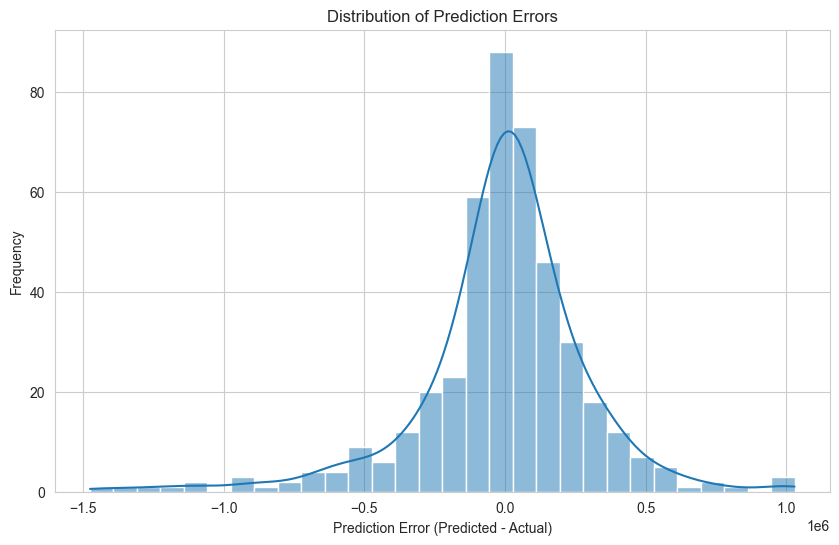

In [91]:
errors = predictions - y_test
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.show()

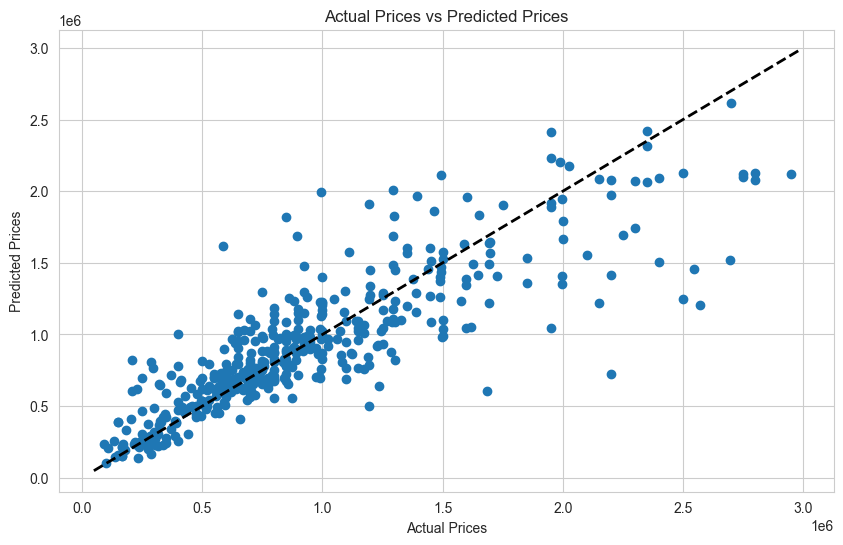

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

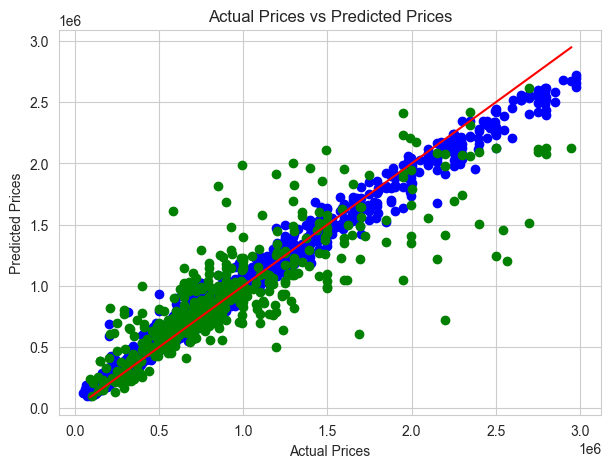

In [93]:
plt.figure(figsize=(7, 5))
plt.scatter(y_train, best_model.predict(X_train_scaler),color="blue")
plt.scatter(y_test, predictions, color="green", label='Predicted Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color="red", label="Regression Line")
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [89]:
# Save Model
with open('Home_model.pkl','wb') as File_1:
    pickle.dump(ensemble_model,File_1)

In [207]:
# Save scaler
with open('scaler.pkl','wb') as File_1:
    pickle.dump(scaler,File_1)

In [208]:
# Save labels
with open('labels.pkl','wb') as File_1:
    pickle.dump(label_encoders,File_1)

In [45]:
with open('Home_model.pkl','rb') as File_2:
    home_model = pickle.load(File_2)

In [48]:
['TYPE',
 'BEDS',
 'BATH',
 'PROPERTYSQFT',
 'SUBLOCALITY',
 'LATITUDE',
 'LONGITUDE',
 'BEDS_BATH_RATIO',
 'SQFT_BEDS_RATIO',
 'SQFT_BATH_RATIO',
 'SQFT For TotalRooms',
 'LOCATION_SIZE',
 'Distance_to_center']

['TYPE',
 'BEDS',
 'BATH',
 'PROPERTYSQFT',
 'SUBLOCALITY',
 'LATITUDE',
 'LONGITUDE',
 'BEDS_BATH_RATIO',
 'SQFT_BEDS_RATIO',
 'SQFT_BATH_RATIO',
 'SQFT For TotalRooms',
 'LOCATION_SIZE',
 'Distance_to_center']

In [49]:
# Full Information Home
#======================================================================
TYPE = 7
#======================================================================
BEDS = 4
#======================================================================
BATH = 5
#======================================================================
Propertysqft = 100
#======================================================================
SUBLOCALITY = 7
#======================================================================
LATITUDE = 45
#======================================================================
LONGITUDE = -75
#======================================================================
BEDS_BATH_RATIO = BEDS/BATH
#======================================================================
SQFT_BEDS_RATIO = Propertysqft/BEDS 
#======================================================================
SQFT_BATH_RATIO = Propertysqft/BATH
#======================================================================
SQFT_FOR_TOTALROOMS = Propertysqft / (BEDS/BATH)
#======================================================================
LOCATION_SIZE = LATITUDE * LONGITUDE * Propertysqft
#======================================================================
DISTANCE_TO_CENTER = haversine(LATITUDE,LONGITUDE)

In [51]:
scaler_list_information = [[TYPE,BEDS,BATH,Propertysqft,SUBLOCALITY,LATITUDE,LONGITUDE,BEDS_BATH_RATIO,SQFT_BEDS_RATIO,SQFT_BATH_RATIO,SQFT_FOR_TOTALROOMS,LOCATION_SIZE,DISTANCE_TO_CENTER]]
df_information = pd.DataFrame(scaler_list_information,columns=X.columns.to_list())
scaler_information = scaler.transform(scaler_list_information)
# Predict
#------------------------------------------------------------------
for key,value in df_information.to_dict().items():
    if key =='TYPE':
        print(f"{key} : {label_encoders['TYPE_Label'][value[0]]}")
    elif key =='SUBLOCALITY':
        print(f"{key} : {label_encoders['SUBLOCALITY_Label'][value[0]]}")
    else:
        print(f"{key} : {value[0]}")
predict = home_model.predict(scaler_list_information)
print(f'Home Price Predicted : $ {int(predict):,.0f}')

TYPE : House for sale
BEDS : 4
BATH : 5
PROPERTYSQFT : 100
SUBLOCALITY : Fort Hamilton
LATITUDE : 45
LONGITUDE : -75
BEDS_BATH_RATIO : 0.8
SQFT_BEDS_RATIO : 25.0
SQFT_BATH_RATIO : 20.0
SQFT For TotalRooms : 125.0
LOCATION_SIZE : -337500
Distance_to_center : 477019.62480532704
Home Price Predicted : $ 1,485,776
